# Setup

## Installs

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import gpxpy
import folium

from route import Route, RouteGroup

In [2]:
plt.ioff()  # Turn off interactive mode

# Read the GPX file and instantiate the Route object

In [3]:
GPX_FILE_PATH = '../../data/gpx/'

# Read the GPX file
gpx_file_name = 'hardrock-counterclockwise-2025.gpx'
full_gpx_file_path = os.path.join(GPX_FILE_PATH, gpx_file_name)
route = Route(full_gpx_file_path)

# Usage

In [4]:
# Test that basic attributes are loaded
print("Basic attributes test:")
print(f"Total distance: {route.total_distance/1000:.1f} km")
print(f"Total elevation gain: {round(route.elevation_gain):,} m")
print(f"Total elevation loss: {round(route.elevation_loss):,} m")
print(f"Average elevation gain per km: {round(route.avg_elevation_gain_per_km):,} m")
print(f"Route % of hard slopes (above {100*route.HARD_SLOPE_THRESHOLD:.0f}%): {100*route.hard_slope_percentage:.1f}%")

Basic attributes test:
Total distance: 162.7 km
Total elevation gain: 9,742 m
Total elevation loss: 9,742 m
Average elevation gain per km: 60 m
Route % of hard slopes (above 20%): 20.9%


In [5]:
# Plot the map
route_map = route.plot_map()
route_map

In [6]:
# Plot the elevation profile
elevation_profile = route.plot_elevation_profile()
elevation_profile


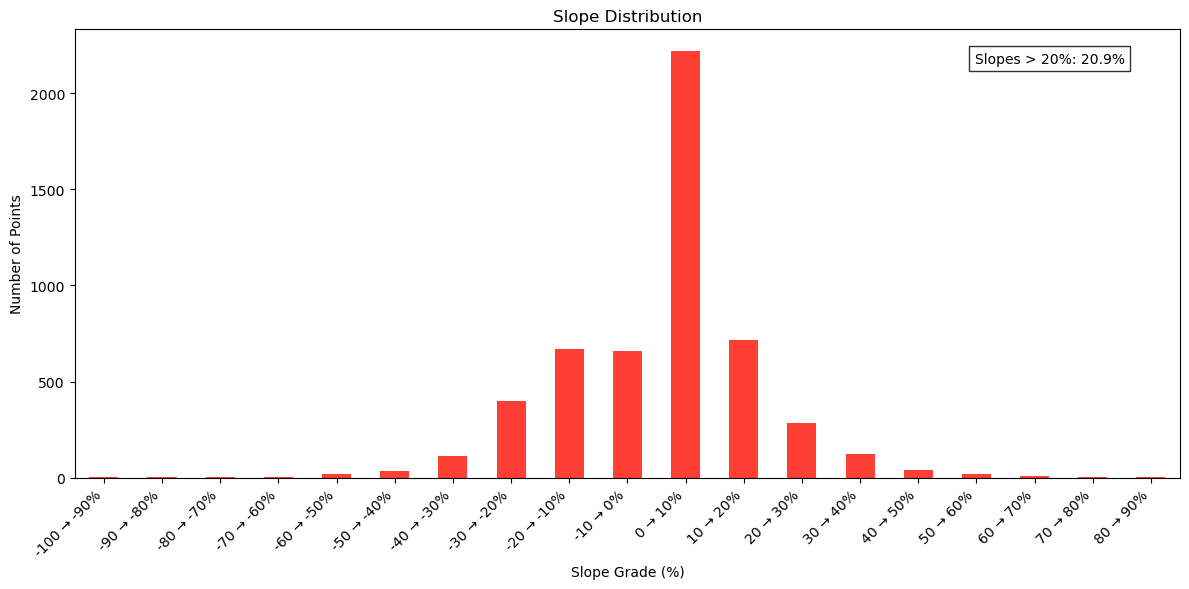

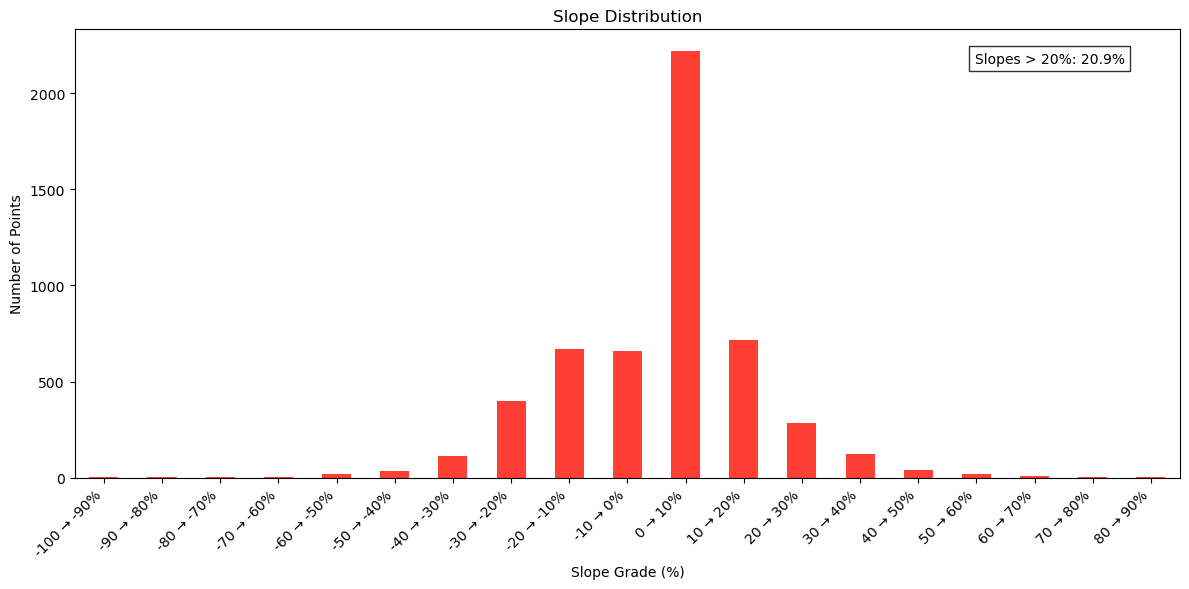

In [7]:
# Plot the slope histogram
slope_histogram = route.plot_slope_histogram()
slope_histogram

In [8]:
# Display the route's DataFrame
route.df

,latitude,longitude,elevation,elevation_diff,distance_between_points_3d,distance_between_points_2d,cum_distance_3d_km,cum_distance_2d_km,cum_elevation,slope_gradient,slope_bin,hard_slope
0,37.812401,-107.665710,2838.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0 → 10%,False
1,37.812130,-107.665253,2837.0,-1.0,50.263151,50.253203,0.050263,0.050253,-1.0,-0.019899,-10 → 0%,False
2,37.812695,-107.664742,2839.0,2.0,77.326898,77.301029,0.127590,0.127554,1.0,0.025873,0 → 10%,False
3,37.813255,-107.664230,2840.0,1.0,76.906600,76.900099,0.204497,0.204454,2.0,0.013004,0 → 10%,False
4,37.813820,-107.663719,2842.0,2.0,77.326500,77.300631,0.281823,0.281755,4.0,0.025873,0 → 10%,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5348,37.810970,-107.667648,2840.0,-12.0,94.155598,93.387775,162.434027,159.146921,2.0,-0.128496,-20 → -10%,False
5349,37.811531,-107.667137,2840.0,0.0,76.939580,76.939580,162.510967,159.223861,2.0,0.000000,0 → 10%,False
5350,37.812092,-107.666626,2838.0,-2.0,76.965370,76.939380,162.587932,159.300800,0.0,-0.025994,-10 → 0%,False
5351,37.812649,-107.666107,2838.0,0.0,76.993192,76.993192,162.664925,159.377794,0.0,0.000000,0 → 10%,False


# Compare routes

In [9]:
# Create a route group
group = RouteGroup()

# Add routes with custom labels
group.add_route(
    route=Route(os.path.join(GPX_FILE_PATH, 'wtr-campos-19-2024.gpx')),
    label='wtr-campos-19-2024'
)
group.add_route(
    route=Route(os.path.join(GPX_FILE_PATH, 'indomit-saobentosdosapucai-21-2024.gpx')),
    label='indomit-saobentosdosapucai-21-2024'
)

# Compare stats
compare_stats_df = group.compare_stats()

compare_stats_df

Route,wtr-campos-19-2024,indomit-saobentosdosapucai-21-2024
Distance (km),18.8,21.6
Elevation Gain (m),801.0,1198.0
Elevation Loss (m),801.0,1098.0
Avg Gain per km (m),43.0,55.0
Hard Slopes (%),23.0,25.1


In [11]:
compare_stats_df.loc['Distance (km)']


Route
wtr-campos-19-2024                    18.8
indomit-saobentosdosapucai-21-2024    21.6
Name: Distance (km), dtype: float64

In [10]:
# Plot elevation comparison
elevation_comparison = group.plot_elevation_comparison()
elevation_comparison